In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.4.1


In [2]:

raw_dataset = pd.read_csv('/content/summarized data from 2015.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()
features=features.drop('Date',axis=1)
features.head(10)

,House_Price_Index,Mortgage_Rate,Personal_Income,Resident_Population,Unemployment_Rate,Owners_Equivalent_Rent,CPI,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,House_Price_Index_2Y,House_Price_Index_1Y,Resident_Population_1Y,GDP_1Y,Mortgage_Rate_1Y,Owners_Equivalent_Rent_1Y,CPI_1Y
0,184.297278,5.93,52698,4473.477,4.7,275.1,214.2,287293.804,1317.6788,40.50%,226272,0.50%,155.002532,167.870272,4458.891,275951.518,5.45,271.3,208.7
1,184.589470,5.86,52698,4473.477,4.4,274.9,214.6,287293.804,1317.6788,40.50%,228755,0.40%,155.538463,169.867481,4458.891,275951.518,5.83,271.5,208.7
2,185.765031,5.72,52698,4473.477,4.3,274.3,214.6,287293.804,1317.6788,40.50%,228755,0.40%,155.644431,170.650905,4458.891,275951.518,6.27,272.6,208.7
3,185.151853,5.58,52698,4473.477,4.8,274.4,217.2,287293.804,1317.6788,40.50%,228755,0.40%,156.590825,172.098920,4458.891,275951.518,6.29,273.8,208.9
4,185.491079,5.70,52698,4473.477,4.6,274.1,217.2,287293.804,1317.6788,40.70%,230170,0.50%,157.129751,172.984694,4458.891,275951.518,6.06,272.0,208.9
5,185.004604,5.82,52698,4473.477,4.3,273.6,220.1,287293.804,1317.6788,40.70%,230170,0.50%,157.985095,174.334073,4458.891,275951.518,5.87,273.0,209.8
6,185.625525,5.77,52698,4473.477,4.7,275.0,220.1,287293.804,1317.6788,40.70%,230170,0.50%,158.785820,175.414340,4458.891,275951.518,5.75,274.1,209.8
7,184.993390,6.07,52698,4473.477,4.2,277.8,218.6,287293.804,1317.6788,40.30%,233969,0.60%,159.886508,177.140210,4458.891,275951.518,5.72,274.4,211.7
8,186.302783,6.33,52698,4473.477,4.4,277.2,218.6,287293.804,1317.6788,40.30%,233969,0.60%,161.145818,178.548111,4458.891,275951.518,5.73,273.5,211.7
9,186.001845,6.27,52698,4473.477,4.2,276.9,220.5,287293.804,1317.6788,40.30%,233969,0.60%,163.164449,180.044039,4458.891,275951.518,5.75,273.1,211.3


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,House_Price_Index,Mortgage_Rate,Personal_Income,Resident_Population,Unemployment_Rate,Owners_Equivalent_Rent,CPI,GDP,Crime_Rate,Median_Debt,House_Price_Index_2Y,House_Price_Index_1Y,Resident_Population_1Y,GDP_1Y,Mortgage_Rate_1Y,Owners_Equivalent_Rent_1Y,CPI_1Y,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,184.297278,5.93,52698,4473.477,4.7,275.1,214.2,287293.804,1317.6788,226272,155.002532,167.870272,4458.891,275951.518,5.45,271.3,208.7,40.5,0.5
1,184.589470,5.86,52698,4473.477,4.4,274.9,214.6,287293.804,1317.6788,228755,155.538463,169.867481,4458.891,275951.518,5.83,271.5,208.7,40.5,0.4
2,185.765031,5.72,52698,4473.477,4.3,274.3,214.6,287293.804,1317.6788,228755,155.644431,170.650905,4458.891,275951.518,6.27,272.6,208.7,40.5,0.4
3,185.151853,5.58,52698,4473.477,4.8,274.4,217.2,287293.804,1317.6788,228755,156.590825,172.098920,4458.891,275951.518,6.29,273.8,208.9,40.5,0.4
4,185.491079,5.70,52698,4473.477,4.6,274.1,217.2,287293.804,1317.6788,230170,157.129751,172.984694,4458.891,275951.518,6.06,272.0,208.9,40.7,0.5


In [4]:
features.isna().sum()

House_Price_Index                        0
Mortgage_Rate                            0
Personal_Income                          0
Resident_Population                      0
Unemployment_Rate                        0
Owners_Equivalent_Rent                   0
CPI                                      0
GDP                                      0
Crime_Rate                               0
Median_Debt                              0
House_Price_Index_2Y                     0
House_Price_Index_1Y                     0
Resident_Population_1Y                   0
GDP_1Y                                   0
Mortgage_Rate_1Y                         0
Owners_Equivalent_Rent_1Y                0
CPI_1Y                                   0
Percent_With_Mortgage_Debt               0
Percent_With_Severely_Delinquent_Debt    0
dtype: int64

In [5]:
train_dataset = features.sample(frac=0.8,random_state=0)
test_dataset = features.drop(train_dataset.index)
type(train_dataset)

pandas.core.frame.DataFrame

In [ ]:
train_dataset

,House_Price_Index,Mortgage_Rate,Personal_Income,Resident_Population,Unemployment_Rate,Owners_Equivalent_Rent,CPI,GDP,Crime_Rate,Median_Debt,House_Price_Index_2Y,House_Price_Index_1Y,Resident_Population_1Y,GDP_1Y,Mortgage_Rate_1Y,Owners_Equivalent_Rent_1Y,CPI_1Y,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
26,174.910943,6.26,56800,4544.705,4.2,284.905,226.247,309327.698,1155.1816,242619,185.765031,184.160602,4503.921,303411.599,6.60,279.300,222.900,42.0,1.1
90,153.928228,3.50,62413,4702.877,6.1,298.073,249.488,365670.891,835.0141,238088,153.862496,150.439820,4656.593,357087.616,4.11,292.827,245.310,39.4,3.5
152,210.692415,3.92,78694,4859.536,2.9,347.148,269.149,463570.556,669.2019,243447,185.827289,195.841230,4841.772,439144.366,3.77,337.737,261.675,36.0,1.1
111,172.770503,4.16,69396,4778.340,5.5,310.588,255.296,406535.712,725.6885,237938,152.493024,161.672798,4746.931,381353.875,4.07,300.343,251.067,38.2,2.6
24,175.603566,6.16,56800,4544.705,4.3,285.280,226.427,309327.698,1155.1816,242531,184.297278,185.542974,4503.921,303411.599,6.32,278.700,221.300,41.2,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,173.968333,4.16,69396,4778.340,5.1,312.866,255.878,406535.712,725.6885,237207,153.928228,167.854665,4746.931,381353.875,4.49,303.524,251.918,38.2,2.5
75,149.804748,4.51,62501,4656.593,7.0,289.930,244.256,357087.616,845.2441,243105,152.198870,158.119674,4609.790,340778.444,4.74,290.905,236.132,40.6,3.9
35,166.502953,5.92,55530,4588.680,4.6,284.283,233.084,312306.078,1104.4477,243986,183.478404,175.925053,4544.705,309327.698,6.29,285.598,226.427,42.1,2.1
23,175.925053,6.29,56800,4544.705,4.7,285.598,226.427,309327.698,1155.1816,242531,183.002431,183.478404,4503.921,303411.599,6.25,277.900,221.300,41.2,1.1


In [ ]:
train_stats = train_dataset.describe()
train_stats.pop('House_Price_Index')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate,124.0,4.776048,1.046272,3.350000,3.910000,4.445000,5.830000,6.760000
Personal_Income,124.0,63388.782258,7924.618941,52698.000000,56482.500000,62413.000000,69396.000000,78694.000000
Resident_Population,124.0,4669.287306,128.586952,4473.477000,4566.348000,4656.593000,4778.340000,4859.536000
Unemployment_Rate,124.0,5.266935,1.376736,2.900000,4.200000,4.950000,6.100000,8.300000
Owners_Equivalent_Rent,124.0,301.105556,20.905088,273.600000,285.186250,293.092000,315.213750,350.824000
CPI,124.0,243.325718,15.238306,214.200000,231.957750,244.802000,255.974000,272.229000
GDP,124.0,363279.901161,54827.384652,287293.804000,312306.078000,357087.616000,406535.712000,463570.556000
Crime_Rate,124.0,927.376685,229.196039,622.451100,721.115375,845.244100,1104.447700,1339.454800
Median_Debt,124.0,240365.112903,4114.009913,226272.000000,238230.500000,239994.000000,243447.000000,246863.000000
House_Price_Index_2Y,124.0,166.135140,12.010991,146.991406,155.047419,166.145391,175.849657,186.043617


In [ ]:
train_labels = train_dataset.pop('House_Price_Index')
test_labels = test_dataset.pop('House_Price_Index')

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.head(20)

,Mortgage_Rate,Personal_Income,Resident_Population,Unemployment_Rate,Owners_Equivalent_Rent,CPI,GDP,Crime_Rate,Median_Debt,House_Price_Index_2Y,House_Price_Index_1Y,Resident_Population_1Y,GDP_1Y,Mortgage_Rate_1Y,Owners_Equivalent_Rent_1Y,CPI_1Y,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
26,1.418324,-0.831432,-0.968857,-0.774975,-0.774958,-1.120775,-0.984038,0.993930,0.547857,1.634327,1.086121,-1.063081,-0.890815,1.597291,-0.900833,-1.014586,1.243199,-1.027033
90,-1.219615,-0.123133,0.261222,0.605101,-0.145063,0.404394,0.043609,-0.402985,-0.553502,-1.021784,-1.338316,0.141895,0.161520,-0.756563,-0.148456,0.398941,-0.103148,0.932230
152,-0.818189,1.931351,1.479533,-1.719237,2.202452,1.694630,1.829207,-1.126437,0.749120,1.639511,1.925927,1.603435,1.770268,-1.077973,2.349456,1.431175,-1.863754,-1.027033
111,-0.588804,0.758045,0.848085,0.169288,0.453595,0.785539,0.788945,-0.879981,-0.589963,-1.135803,-0.530694,0.854895,0.637268,-0.794376,0.269587,0.762067,-0.724538,0.197506
24,1.322746,-0.831432,-0.968857,-0.702339,-0.757019,-1.108963,-0.984038,0.993930,0.526466,1.512127,1.185509,-1.063081,-0.890815,1.332601,-0.934205,-1.115507,0.828939,-1.027033
7,1.236726,-1.349059,-1.522785,-0.774975,-1.114827,-1.622603,-1.385915,1.702918,-1.554715,-0.520243,0.581372,-1.418484,-1.429178,0.765407,-1.173373,-1.721034,0.362895,-1.435213
44,1.255842,-0.991692,-0.626870,0.241923,-0.824802,-0.720009,-0.929715,0.772574,1.517470,0.829602,0.013292,-0.741190,-0.774828,1.228615,-0.445135,-0.523289,1.294982,0.360778
106,-0.330744,0.243572,0.603822,0.532466,0.276126,0.642938,0.329652,-0.879981,-0.369497,-1.469491,-0.856375,0.507195,0.329798,-1.418290,0.214134,0.692053,-0.569191,0.279142
56,0.099354,-0.672308,-0.800542,1.694635,-0.381417,-0.442091,-0.636391,0.281759,0.954273,0.258414,-1.048780,-0.394114,-0.716436,1.115176,-0.647037,-0.418268,0.725373,1.748590
118,-1.057133,0.758045,0.848085,-0.121255,0.766964,0.736977,0.788945,-0.962421,-0.375573,-0.748659,0.103659,0.854895,0.637268,-0.454060,0.633066,0.891751,-0.931668,0.034234


In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1216      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.1465702 ],
       [-0.3901528 ],
       [-1.124173  ],
       [-0.13538708],
       [ 0.28816307],
       [-0.03719589],
       [-0.01077875],
       [-0.265706  ],
       [-0.39282727],
       [-0.13604122]], dtype=float32)

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 2000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

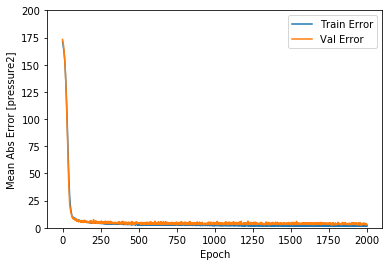

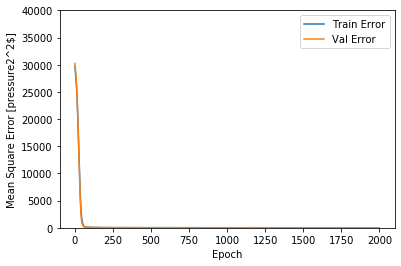

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [pressure2]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,200])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [pressure2^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,40000])
  plt.legend()
  plt.show()


plot_history(history)

Mean Absolute Error: 2.56
Accuracy: 98.42 %.


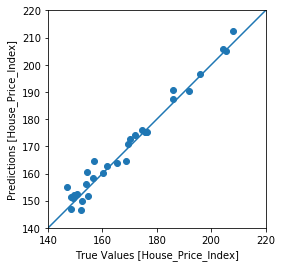

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

test_errors = abs(test_predictions - test_labels)


print('Mean Absolute Error:', round(np.mean(test_errors), 2))

mape = np.mean(100 * (test_errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.2
Accuracy: 98.72 %.


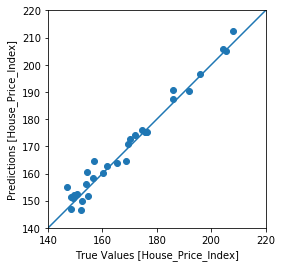

In [ ]:
train_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
train_errors = abs(train_predictions - train_labels)


print('Mean Absolute Error:', round(np.mean(train_errors), 2))

mape = np.mean(100 * (train_errors / train_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')